In [1]:
# for data manipulation and analysis
import pandas as pd
import numpy as np

# for plotting
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
sns.set_style('darkgrid')

# Silhouette analysis
from sklearn.metrics import silhouette_score

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# for scaling
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset
online_retail = pd.read_excel("Online Retail dataset.xlsx")

# looking at top 5 rows
online_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
# checking the number of rows and columns
online_retail.shape

(541909, 8)

In [4]:
# looking at the overall picture
online_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
# checking the number of missing values in each column
online_retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<font size="5">**BASIC CLEANING**</font>

In [6]:
# count of duplicated rows in the data
online_retail.duplicated().sum()

5268

In [7]:
# removing the duplicate rows
online_retail = online_retail[~online_retail.duplicated()]
online_retail.shape

(536641, 8)

<font size="3">**Invoice No**</font>

In [8]:
# these are the transactions that have negative quantity which indicates returned or cancelled orders
online_retail[online_retail['InvoiceNo'].str.startswith('C')==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [9]:
# removing all the invoice number who starts with 'C' as they are returned orders
online_retail = online_retail[online_retail['InvoiceNo'].str.startswith('C')!=True]
online_retail.shape

(527390, 8)

In [10]:
# checking the number of unique transactions
# though there are more than 5 lakh entries but the number of transaction happened is 21892
online_retail.InvoiceNo.nunique()

22064

<font size="3">**Stock Code**</font>

In [11]:
# checking the unique stock ids in the data or number of unqiue item sold by retailer
online_retail.StockCode.nunique()

4059

In [12]:
# top 10 stock ids that sold the most
online_retail.StockCode.value_counts().head(10)

85123A    2259
85099B    2112
22423     2012
47566     1700
20725     1582
84879     1477
22197     1418
22720     1396
21212     1352
22383     1307
Name: StockCode, dtype: int64

<font size="3">**Quantity**</font>

In [13]:
# looking at the distribution of the quantity
# we seen that there is negative value which might indicate return orders
online_retail.Quantity.describe()

count    527390.000000
mean         10.311272
std         160.367285
min       -9600.000000
25%           1.000000
50%           3.000000
75%          11.000000
max       80995.000000
Name: Quantity, dtype: float64

In [14]:
# looking at the data where quantity is negative and possible explanation is these are return orders or cancelled order
online_retail[online_retail['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.0,NaN,United Kingdom
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,NaN,United Kingdom
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom


In [15]:
# keeping only those transactions that have successfully ordered
online_retail = online_retail[online_retail['Quantity']>=0]
online_retail.shape

(526054, 8)

<font size="3">**Invoice Date**</font>

In [16]:
print('The minimum date is:',online_retail.InvoiceDate.min())
print('The maximum date is:',online_retail.InvoiceDate.max())

The minimum date is: 2010-12-01 08:26:00
The maximum date is: 2011-12-09 12:50:00


<font size="3">**Unit Price**</font>

In [17]:
# checking the distribution of unit price
online_retail.UnitPrice.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    526054.000000
mean          3.871747
std          42.016560
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
90%           7.950000
95%           9.950000
99%          16.980000
max       13541.330000
Name: UnitPrice, dtype: float64

<font size="3">**Country**</font>

In [18]:
# we see that more than 90% have country as UK which is obvious as the retailer is UK based
online_retail.Country.value_counts(normalize=True)

United Kingdom          0.914627
Germany                 0.017160
France                  0.015955
EIRE                    0.014985
Spain                   0.004714
Netherlands             0.004492
Belgium                 0.003861
Switzerland             0.003724
Portugal                0.002836
Australia               0.002251
Norway                  0.002038
Italy                   0.001441
Channel Islands         0.001420
Finland                 0.001302
Cyprus                  0.001146
Sweden                  0.000855
Unspecified             0.000840
Austria                 0.000757
Denmark                 0.000722
Poland                  0.000627
Japan                   0.000610
Israel                  0.000555
Hong Kong               0.000532
Singapore               0.000422
Iceland                 0.000346
USA                     0.000340
Canada                  0.000287
Greece                  0.000276
Malta                   0.000213
United Arab Emirates    0.000129
European C

In [19]:
temp = online_retail.groupby(['Country'],as_index=False).agg({'InvoiceNo':'nunique'}).rename(columns = {'InvoiceNo':'Orders'})
total = temp['Orders'].sum(axis=0)
temp['%Orders'] = round((temp['Orders']/total)*100,4)

In [20]:
temp.sort_values(by=['%Orders'],ascending=False,inplace=True)
temp.reset_index(drop=True,inplace=True)

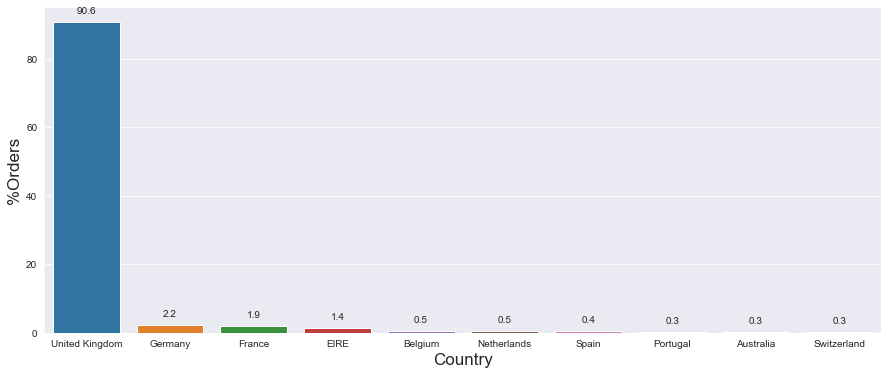

In [21]:
#Plotting the percentage of orders from the top 10 countries, sorted by the number of orders
plt.figure(figsize=(15,6))
splot=sns.barplot(x="Country",y="%Orders",data=temp[:10])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 11), 
                   textcoords = 'offset points')
plt.xlabel("Country", size=17)
plt.ylabel("%Orders", size=17)
plt.show()

In [22]:
# putting UK as one country and combine rest countries into one category
online_retail['Country'] = online_retail['Country'].apply(lambda x:'United Kingdom' if x=='United Kingdom' else 'Others')
online_retail.Country.value_counts(normalize=True)

United Kingdom    0.914627
Others            0.085373
Name: Country, dtype: float64

<font size="3">**Description**</font>

In [23]:
# checking the number of unique item list
online_retail.Description.nunique()

4077

In [24]:
# top 10 item sold
online_retail.Description.value_counts().head(10)

WHITE HANGING HEART T-LIGHT HOLDER    2315
JUMBO BAG RED RETROSPOT               2112
REGENCY CAKESTAND 3 TIER              2009
PARTY BUNTING                         1700
LUNCH BAG RED RETROSPOT               1581
ASSORTED COLOUR BIRD ORNAMENT         1476
SET OF 3 CAKE TINS PANTRY DESIGN      1392
PACK OF 72 RETROSPOT CAKE CASES       1352
LUNCH BAG  BLACK SKULL.               1301
NATURAL SLATE HEART CHALKBOARD        1255
Name: Description, dtype: int64

In [25]:
# there are cases where the descriptions contains some code/name which are not directly refers to sales
# checking the data where description = ? and it is noted that customerid is NaN and unit price is 0
online_retail[online_retail['Description'].str.startswith('?')==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
38261,539494,21479,?,752,2010-12-20 10:36:00,0.0,NaN,United Kingdom
115807,546139,84988,?,3000,2011-03-09 16:35:00,0.0,NaN,United Kingdom
220843,556231,85123A,?,4000,2011-06-09 15:04:00,0.0,NaN,United Kingdom
282882,561665,22171,?,142,2011-07-28 16:55:00,0.0,NaN,United Kingdom
323315,565288,23135,?,101,2011-09-02 11:43:00,0.0,NaN,United Kingdom
421093,572920,72803A,?,117,2011-10-26 16:52:00,0.0,NaN,United Kingdom


In [26]:
# removing all the above entries
online_retail = online_retail[online_retail['Description'].str.startswith('?')!=True]
online_retail.shape

(526048, 8)

In [27]:
# checking the data where description = * and it is noted that customerid is NaN
online_retail[online_retail['Description'].str.startswith('*')==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
20749,538071,21120,*Boombox Ipod Classic,1,2010-12-09 14:09:00,16.98,NaN,United Kingdom
35675,539437,20954,*USB Office Mirror Ball,1,2010-12-17 14:54:00,8.47,NaN,United Kingdom
37095,539453,20954,*USB Office Mirror Ball,1,2010-12-17 17:08:00,8.47,NaN,United Kingdom


In [28]:
# replacing with appropriate name
online_retail['Description'] = online_retail['Description'].replace(('*Boombox Ipod Classic','*USB Office Mirror Ball'),
                                             ('BOOMBOX IPOD CLASSIC','USB OFFICE MIRROR BALL'))

In [29]:
# Description have actual entries in uppercase words and those who don't have are some of the noises in the dataset
online_retail[online_retail['Description'].str.islower()==True]['Description'].value_counts()

check                                  39
found                                  25
adjustment                             14
amazon                                  8
had been put aside                      5
dotcom                                  4
mailout                                 3
taig adjust                             2
returned                                2
test                                    2
wrongly sold (22719) barcode            1
did  a credit  and did not tick ret     1
alan hodge cant mamage this section     1
wrongly marked 23343                    1
amazon sales                            1
on cargo order                          1
michel oops                             1
found box                               1
dotcom adjust                           1
mailout                                 1
wrongly coded 23343                     1
website fixed                           1
to push order througha s stock was      1
damaged                           

In [30]:
# removing all the above noises
online_retail = online_retail[online_retail['Description'].str.islower()!=True]
online_retail.shape

(525920, 8)

In [31]:
# Description have actual entries in uppercase words and those who don't have are some of the noises in the dataset
online_retail[online_retail['Description'].str.istitle()==True]['Description'].value_counts()

Manual                                 323
Next Day Carriage                       79
Bank Charges                            12
Dotcomgiftshop Gift Voucher £20.00       9
Dotcomgiftshop Gift Voucher £10.00       8
Found                                    8
Amazon                                   7
Dotcomgiftshop Gift Voucher £30.00       7
Dotcomgiftshop Gift Voucher £50.00       4
Dotcomgiftshop Gift Voucher £40.00       3
High Resolution Image                    3
Adjustment                               2
Amazon Adjustment                        1
Dotcomgiftshop Gift Voucher £100.00      1
John Lewis                               1
Name: Description, dtype: int64

In [32]:
# removing all the above listed noises
online_retail = online_retail[online_retail['Description'].str.istitle()!=True]
online_retail.shape

(525452, 8)

In [33]:
online_retail['Description'] = online_retail['Description'].str.strip()

<font size="3">**Customer ID**</font>

In [34]:
# count of unique customer
online_retail.CustomerID.nunique()

4335

In [35]:
# checking where customer id is null
online_retail[online_retail.CustomerID.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [36]:
# removing entries where customer id is null
online_retail = online_retail[~online_retail.CustomerID.isnull()]
online_retail.shape

(392353, 8)

In [37]:
online_retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392353 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392353 non-null  object        
 1   StockCode    392353 non-null  object        
 2   Description  392353 non-null  object        
 3   Quantity     392353 non-null  int64         
 4   InvoiceDate  392353 non-null  datetime64[ns]
 5   UnitPrice    392353 non-null  float64       
 6   CustomerID   392353 non-null  float64       
 7   Country      392353 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 26.9+ MB


In [38]:
online_retail.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [39]:
# checking random 5 rows from data
online_retail.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
535128,581188,22632,HAND WARMER RED RETROSPOT,12,2011-12-07 16:47:00,2.10,17735.0,United Kingdom
249885,558927,22383,LUNCH BAG SUKI DESIGN,10,2011-07-05 10:23:00,1.65,18177.0,United Kingdom
446054,574871,22112,CHOCOLATE HOT WATER BOTTLE,2,2011-11-07 12:56:00,4.95,14527.0,United Kingdom
476828,577034,84859C,PINK DISCO HANDBAG,4,2011-11-17 13:16:00,1.95,12847.0,United Kingdom
201201,554275,21136,PAINTED METAL PEARS ASSORTED,8,2011-05-23 13:17:00,1.69,14903.0,United Kingdom


<font size="5">**EXPLORATORY DATA ANALYSIS**</font>

In [40]:
# creating some columns for exploratory

online_retail['Amount'] = online_retail['Quantity']*online_retail['UnitPrice']
online_retail['year'] = online_retail['InvoiceDate'].dt.year
online_retail['month'] = online_retail['InvoiceDate'].dt.month
online_retail['day'] = online_retail['InvoiceDate'].dt.day
online_retail['hour'] = online_retail['InvoiceDate'].dt.hour
online_retail['day_of_week'] = online_retail['InvoiceDate'].dt.dayofweek

In [41]:
online_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,year,month,day,hour,day_of_week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,8,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,8,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2


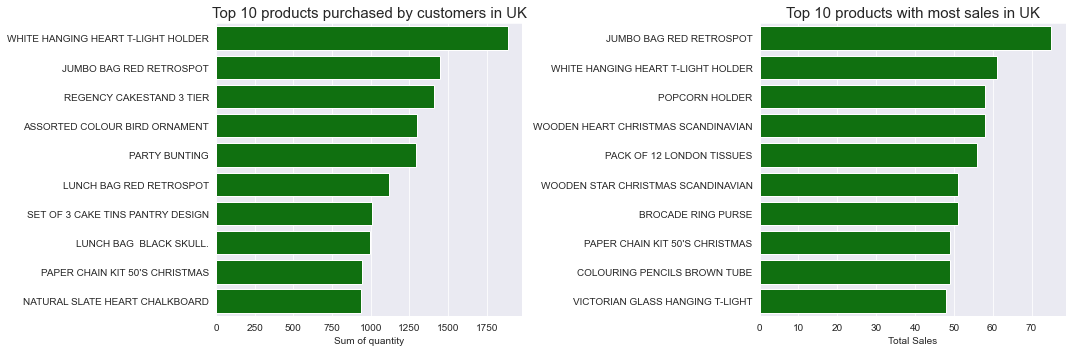

In [42]:
column = ['InvoiceNo','Amount']

plt.figure(figsize=(15,5))
for i,j in enumerate(column):
    plt.subplot(1,2,i+1)
    sns.barplot(x = online_retail[online_retail['Country']=='United Kingdom'].groupby('Description')[j].nunique().sort_values(ascending=False).head(10).values,
                y = online_retail[online_retail['Country']=='United Kingdom'].groupby('Description')[j].nunique().sort_values(ascending=False).head(10).index,
                color='green')
    plt.ylabel('')
    if i==0:
        plt.xlabel('Sum of quantity')
        plt.title('Top 10 products purchased by customers in UK',size=15)
    else:
        plt.xlabel('Total Sales')
        plt.title('Top 10 products with most sales in UK',size=15)
        
plt.tight_layout()
plt.show()

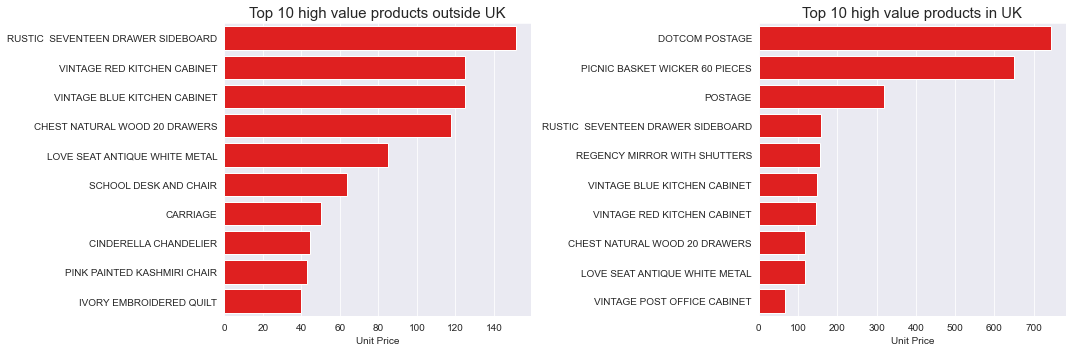

In [43]:
column = ['Others','United Kingdom']

plt.figure(figsize=(15,5))
for i,j in enumerate(column):
    plt.subplot(1,2,i+1)
    sns.barplot(x = online_retail[online_retail['Country']==j].groupby('Description')['UnitPrice'].mean().sort_values(ascending=False).head(10).values,
                y = online_retail[online_retail['Country']==j].groupby('Description')['UnitPrice'].mean().sort_values(ascending=False).head(10).index,
                color='red')
    plt.ylabel('')
    if i==0:
        plt.xlabel('Unit Price')
        plt.title('Top 10 high value products outside UK',size=15)
    else:
        plt.xlabel('Unit Price')
        plt.title('Top 10 high value products in UK',size=15)
        
plt.tight_layout()
plt.show()

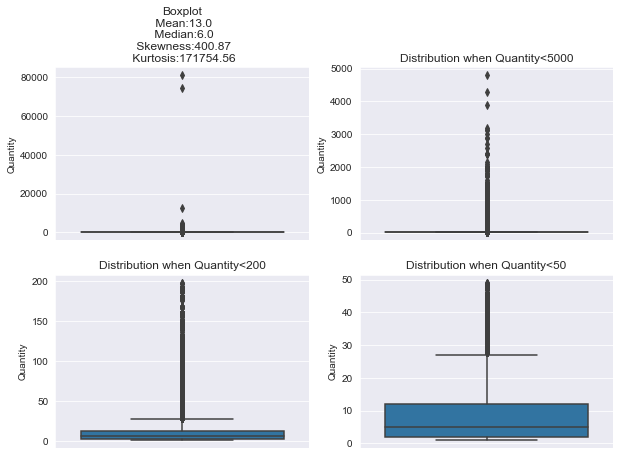

In [44]:
# Looking the distribution of column Quantity
plt.figure(figsize=(10,7))

skewness = round(online_retail.Quantity.skew(),2)
kurtosis = round(online_retail.Quantity.kurtosis(),2)
mean = round(np.mean(online_retail.Quantity),0)
median = np.median(online_retail.Quantity)

plt.subplot(2,2,1)
sns.boxplot(y=online_retail.Quantity)
plt.title('Boxplot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.subplot(2,2,2)
sns.boxplot(y=online_retail[online_retail.Quantity<5000]['Quantity'])
plt.title('Distribution when Quantity<5000')

plt.subplot(2,2,3)
sns.boxplot(y=online_retail[online_retail.Quantity<200]['Quantity'])
plt.title('Distribution when Quantity<200')

plt.subplot(2,2,4)
sns.boxplot(y=online_retail[online_retail.Quantity<50]['Quantity'])
plt.title('Distribution when Quantity<50')

plt.show()

In [45]:
# removing the expectional case where quantity > 70000
online_retail = online_retail[online_retail['Quantity']<70000]

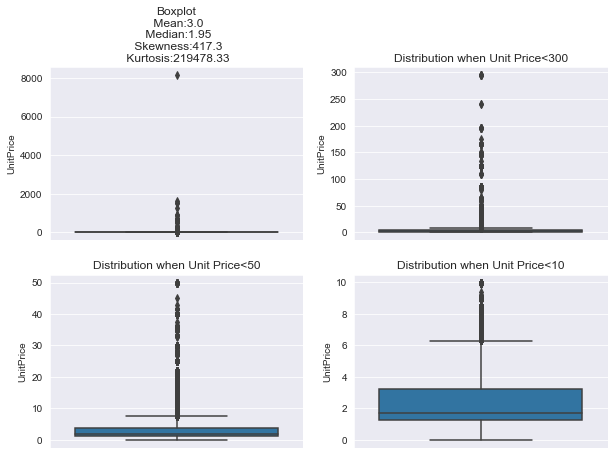

In [46]:
# Looking the distribution of column Unit Price
plt.figure(figsize=(10,7))

skewness = round(online_retail.UnitPrice.skew(),2)
kurtosis = round(online_retail.UnitPrice.kurtosis(),2)
mean = round(np.mean(online_retail.UnitPrice),0)
median = np.median(online_retail.UnitPrice)

plt.subplot(2,2,1)
sns.boxplot(y=online_retail.UnitPrice)
plt.title('Boxplot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.subplot(2,2,2)
sns.boxplot(y=online_retail[online_retail.UnitPrice<300]['UnitPrice'])
plt.title('Distribution when Unit Price<300')

plt.subplot(2,2,3)
sns.boxplot(y=online_retail[online_retail.UnitPrice<50]['UnitPrice'])
plt.title('Distribution when Unit Price<50')

plt.subplot(2,2,4)
sns.boxplot(y=online_retail[online_retail.UnitPrice<10]['UnitPrice'])
plt.title('Distribution when Unit Price<10')

plt.show()

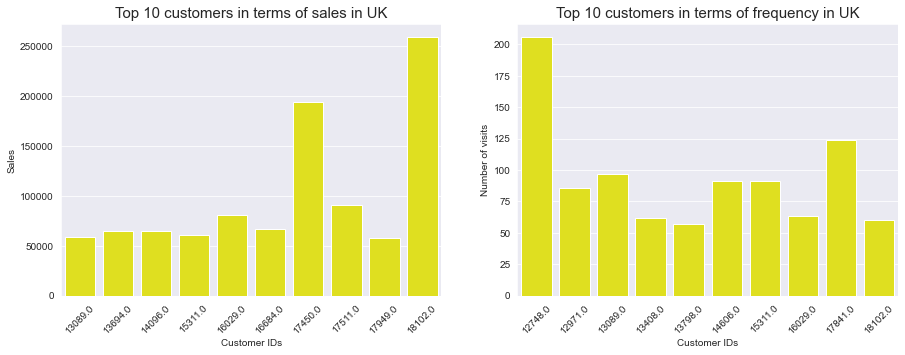

In [47]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.barplot(y = online_retail[online_retail['Country']=='United Kingdom'].groupby('CustomerID')['Amount'].sum().sort_values(ascending=False).head(10).values,
            x = online_retail[online_retail['Country']=='United Kingdom'].groupby('CustomerID')['Amount'].sum().sort_values(ascending=False).head(10).index, 
            color='yellow')
plt.ylabel('Sales')
plt.xlabel('Customer IDs')
plt.xticks(rotation=45)
plt.title('Top 10 customers in terms of sales in UK',size=15)

plt.subplot(1,2,2)
sns.barplot(y = online_retail[online_retail['Country']=='United Kingdom'].groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False).head(10).values,
            x = online_retail[online_retail['Country']=='United Kingdom'].groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False).head(10).index, 
            color='yellow')
plt.ylabel('Number of visits')
plt.xlabel('Customer IDs')
plt.xticks(rotation=45)
plt.title('Top 10 customers in terms of frequency in UK',size=15)

plt.show()

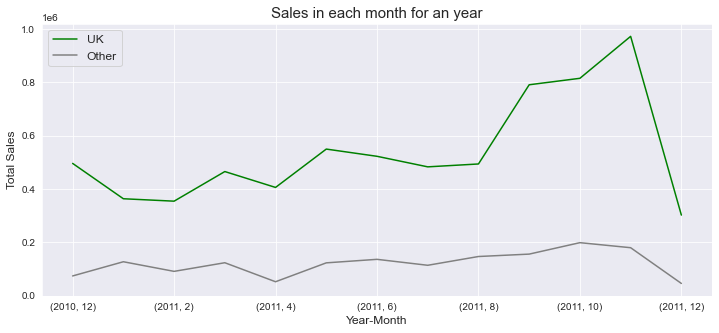

In [48]:
plt.figure(figsize=(12,5))
online_retail[online_retail['Country']=='United Kingdom'].groupby(['year','month'])['Amount'].sum().plot(kind='line',label='UK',color='green')
online_retail[online_retail['Country']=='Others'].groupby(['year','month'])['Amount'].sum().plot(kind='line',label='Other',color='grey')
plt.xlabel('Year-Month',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales in each month for an year', size=15)
plt.legend(fontsize=12)
plt.show()

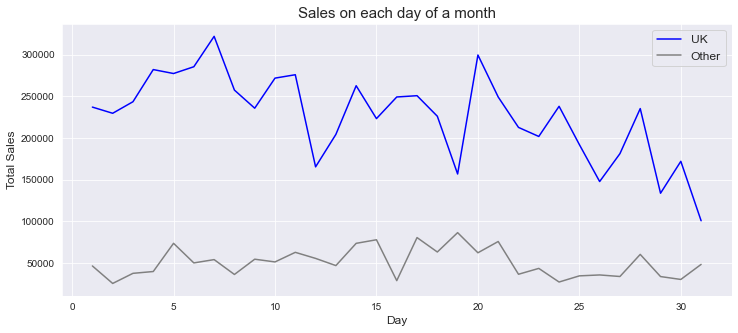

In [49]:
plt.figure(figsize=(12,5))
online_retail[online_retail['Country']=='United Kingdom'].groupby(['day'])['Amount'].sum().plot(kind='line',label='UK',color='blue')
online_retail[online_retail['Country']=='Others'].groupby(['day'])['Amount'].sum().plot(kind='line',label='Other',color='grey')
plt.xlabel('Day',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales on each day of a month', size=15)
plt.legend(fontsize=12)
plt.show()

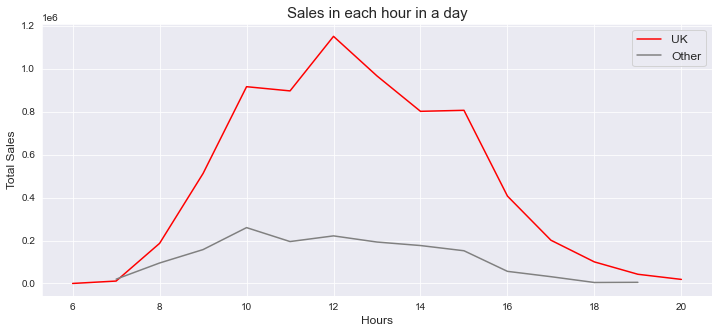

In [50]:
plt.figure(figsize=(12,5))
online_retail[online_retail['Country']=='United Kingdom'].groupby(['hour'])['Amount'].sum().plot(kind='line',label='UK',color='red')
online_retail[online_retail['Country']=='Others'].groupby(['hour'])['Amount'].sum().plot(kind='line',label='Other',color='grey')
plt.xlabel('Hours',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales in each hour in a day', size=15)
plt.legend(fontsize=12)
plt.show()

<font size="5">**COHORT ANALYSIS**</font>

In [51]:
# copying the data into new df
online_retail_cohort = online_retail.copy()
# select only limited columns
online_retail_cohort = online_retail_cohort.iloc[:,:9]
online_retail_cohort.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [52]:
# creating the first variable 'Invoice Month'
# extracting only year-month from Invoice Date and day will be 1 automatically

online_retail_cohort['InvoiceMonth'] = online_retail_cohort['InvoiceDate'].dt.strftime('%Y-%m')
# converting the variable to datetime format
online_retail_cohort['InvoiceMonth'] = pd.to_datetime(online_retail_cohort['InvoiceMonth'])

In [53]:
# creating the second variable 'Cohort Month'
# getting the first time purchase date for each customer

online_retail_cohort['CohortMonth'] = online_retail_cohort.groupby('CustomerID')['InvoiceMonth'].transform('min')
# converting the variable to datetime format
online_retail_cohort['CohortMonth'] = pd.to_datetime(online_retail_cohort['CohortMonth'])

In [54]:
online_retail_cohort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392351 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     392351 non-null  object        
 1   StockCode     392351 non-null  object        
 2   Description   392351 non-null  object        
 3   Quantity      392351 non-null  int64         
 4   InvoiceDate   392351 non-null  datetime64[ns]
 5   UnitPrice     392351 non-null  float64       
 6   CustomerID    392351 non-null  float64       
 7   Country       392351 non-null  object        
 8   Amount        392351 non-null  float64       
 9   InvoiceMonth  392351 non-null  datetime64[ns]
 10  CohortMonth   392351 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(3), int64(1), object(4)
memory usage: 35.9+ MB


In [55]:
# creating the third variable 'Cohort Period'
# for this we create a function which calculates the number of month between their first purchase date and Invoice date

def diff_month(d1, d2):
    return((d1.dt.year - d2.dt.year) * 12 + d1.dt.month - d2.dt.month)

online_retail_cohort['CohortPeriod'] = diff_month(online_retail_cohort['InvoiceMonth'], online_retail_cohort['CohortMonth'])

In [56]:
online_retail_cohort.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,InvoiceMonth,CohortMonth,CohortPeriod
49101,540501,21198,WHITE HEART CONFETTI IN TUBE,48,2011-01-09 10:43:00,0.42,13162.0,United Kingdom,20.16,2011-01-01,2011-01-01,0
440629,574544,22632,HAND WARMER RED RETROSPOT,4,2011-11-04 14:49:00,2.10,17084.0,United Kingdom,8.40,2011-11-01,2011-11-01,0
211275,555353,22776,SWEETHEART CAKESTAND 3 TIER,1,2011-06-02 13:22:00,9.95,16928.0,United Kingdom,9.95,2011-06-01,2010-12-01,6
283363,561711,23194,GYMKHANA TREASURE BOOK BOX,8,2011-07-29 11:45:00,2.25,13414.0,United Kingdom,18.00,2011-07-01,2011-02-01,5
205123,554712,22852,DOG BOWL VINTAGE CREAM,4,2011-05-26 10:43:00,4.25,16873.0,United Kingdom,17.00,2011-05-01,2010-12-01,5


In [57]:
customer_cohort = online_retail_cohort.pivot_table(index='CohortMonth', columns='CohortPeriod', values='CustomerID', aggfunc='nunique')
customer_cohort

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12-01,884.0,323.0,286.0,339.0,321.0,352.0,320.0,308.0,312.0,349.0,330.0,444.0,234.0
2011-01-01,415.0,91.0,111.0,96.0,132.0,120.0,103.0,100.0,124.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,109.0,103.0,94.0,97.0,104.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,67.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,63.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,26.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,80.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,187.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observations:

The above table show retention and acquistion of customers.

Vertically i.e. the first column '0' tells how many new customers the business acquired in a particular month. ex: 884 is the number of customers business acquired in Dec'2010, 415 is the number of customers(different from previous month) business acquired in Jan'2011, and so on.

Horizontally i.e the first row tells the number of customers who is continuing to be part of business since their first purchase i.e. Dec'2010. ex: 323 is the number of customers out of 884 that continue to purchase one month after their first purchase, 286 is the number of customers that continue to purchase two months after their first purchase, and so on.

In [58]:
# Retention table

cohort_size = customer_cohort.iloc[:,0]
retention = customer_cohort.divide(cohort_size,axis=0) #axis=0 to ensure the divide along the row axis
retention.index = pd.to_datetime(retention.index).date
retention.round(3) * 100 #to show the number as percentage

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12
2010-12-01,100.0,36.5,32.4,38.3,36.3,39.8,36.2,34.8,35.3,39.5,37.3,50.2,26.5
2011-01-01,100.0,21.9,26.7,23.1,31.8,28.9,24.8,24.1,29.9,32.8,36.6,11.8,NaN
2011-02-01,100.0,18.7,18.7,28.7,27.1,24.7,25.5,27.4,24.7,30.5,6.8,NaN,NaN
2011-03-01,100.0,14.8,25.2,19.9,22.3,16.8,26.8,23.0,27.9,8.6,NaN,NaN,NaN
2011-04-01,100.0,21.0,20.3,21.0,19.7,22.7,21.7,26.0,7.3,NaN,NaN,NaN,NaN
2011-05-01,100.0,19.0,17.3,17.3,20.8,23.2,26.4,9.2,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,17.4,15.7,26.4,23.1,33.1,9.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,18.2,20.9,22.5,27.3,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,20.7,24.9,24.3,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09-01,100.0,23.4,30.1,11.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observations:
    
The above table is nothing but showing value in percentages.

We can see that over the period of time how the customer interact with the business. ex- In Jan'2011 the business acquire some new customers but after one month only 21.9% are retained or say revisit again. Then the number rise to 26.7% which means some customers back and purchase again and the reason could be an invitation/offers is sent to those group of customers.


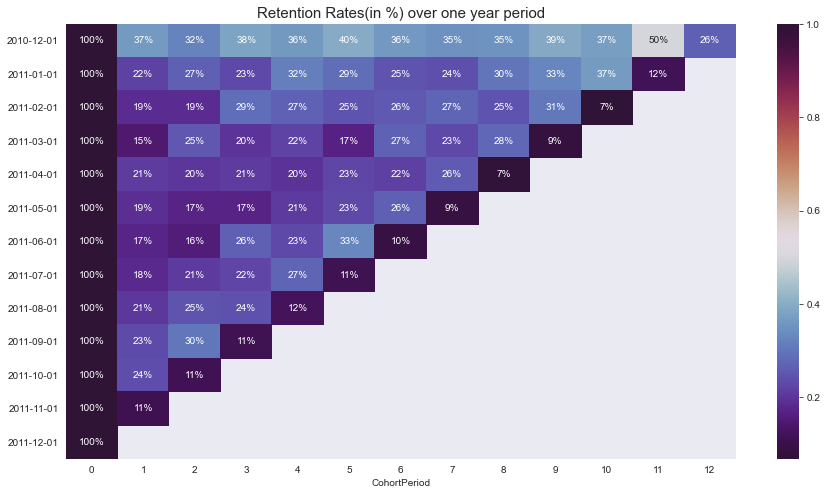

In [59]:
#Build the heatmap or pictorial representation of above table

plt.figure(figsize=(15, 8))
plt.title('Retention Rates(in %) over one year period', size=15)
sns.heatmap(data=retention, annot = True, fmt = '.0%', cmap="twilight_shifted")
plt.show()

In [60]:
amount_cohort = online_retail_cohort.pivot_table(index='CohortMonth', columns='CohortPeriod', values='Amount', aggfunc='mean').round(2)
amount_cohort

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12-01,22.23,27.28,26.87,26.90,21.16,28.14,28.29,27.40,28.99,33.44,33.73,23.56,25.8
2011-01-01,19.79,24.47,20.98,28.66,22.40,26.29,25.25,25.39,19.09,21.14,19.73,19.78,NaN
2011-02-01,18.00,20.30,20.49,19.49,17.69,16.97,22.33,22.61,18.80,22.19,23.50,NaN,NaN
2011-03-01,17.55,20.35,22.58,18.03,20.96,19.00,22.04,19.68,16.80,13.19,NaN,NaN,NaN
2011-04-01,16.89,20.85,19.50,18.74,19.55,15.00,15.25,15.97,12.34,NaN,NaN,NaN,NaN
2011-05-01,19.90,17.36,22.29,20.91,18.61,14.11,17.02,14.06,NaN,NaN,NaN,NaN,NaN
2011-06-01,24.00,16.31,19.95,20.46,15.35,16.32,13.22,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,14.88,23.53,11.80,13.03,10.90,11.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,16.52,13.16,12.53,15.89,17.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observation:
    
The above table shows the average amount spent by the group of customers over the period of time.

ex: For the group of customers of Jan'2011 they initially spent 19.79 but after one month they spent 24.47 higher than the previous, then they spend 20.98 after two months and so on.

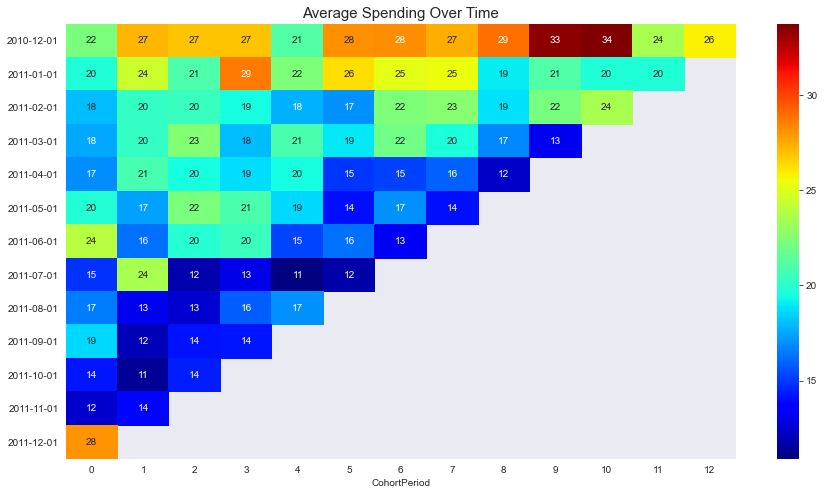

In [61]:
#Build the heatmap or pictorial representation of above table

amount_cohort.index = pd.to_datetime(amount_cohort.index).date
plt.figure(figsize=(15, 8))
plt.title('Average Spending Over Time', size=15)
sns.heatmap(data = amount_cohort, annot = True, cmap="jet")
plt.show()

<font size="5">**RFM (RECENCY, FREQUENCY, MONETARY) ANALYSIS**</font>

In [62]:
# copying the data in other df
online_retail_rfm = online_retail.copy()
# keeping only desired columns
online_retail_rfm = online_retail_rfm.iloc[:,:9]
online_retail_rfm.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [63]:
# extracting the RECENCY

recency = pd.DataFrame(online_retail_rfm.groupby('CustomerID')['InvoiceDate'].max().reset_index())
recency['InvoiceDate'] = pd.to_datetime(recency['InvoiceDate']).dt.date
recency['MaxDate'] = recency['InvoiceDate'].max()
recency['recency'] = (recency['MaxDate'] - recency['InvoiceDate']).dt.days + 1
recency = recency[['CustomerID','recency']]
recency.head()

,CustomerID,recency
0,12347.0,3
1,12348.0,76
2,12349.0,19
3,12350.0,311
4,12352.0,37


In [64]:
# extracting the FREQUENCY

frequency = pd.DataFrame(online_retail_rfm.groupby('CustomerID')['InvoiceNo'].nunique().reset_index())
frequency.columns = ['fCustomerID','frequency']
frequency.head()

,fCustomerID,frequency
0,12347.0,7
1,12348.0,4
2,12349.0,1
3,12350.0,1
4,12352.0,7


In [65]:
# extracting the MONETARY

monetary = pd.DataFrame(online_retail_rfm.groupby('CustomerID')['Amount'].sum().reset_index())
monetary.columns = ['mCustomerID','monetary']
monetary.head()

,mCustomerID,monetary
0,12347.0,4310.00
1,12348.0,1797.24
2,12349.0,1757.55
3,12350.0,334.40
4,12352.0,1665.74


In [66]:
# combining the three into one table

rfm = pd.concat([recency,frequency,monetary], axis=1)
rfm.drop(['fCustomerID','mCustomerID'], axis=1, inplace=True)
rfm.head(10)

,CustomerID,recency,frequency,monetary
0,12347.0,3,7,4310.00
1,12348.0,76,4,1797.24
2,12349.0,19,1,1757.55
3,12350.0,311,1,334.40
4,12352.0,37,7,1665.74
5,12353.0,205,1,89.00
6,12354.0,233,1,1079.40
7,12355.0,215,1,459.40
8,12356.0,23,3,2811.43
9,12357.0,34,1,6207.67


Here, I created a new variable Speed of Visit which basically tells in how many days, on an average, the customer revisit. Example: Suppose a customer visit a store 10 times in a year. Its frequency is 10. He/She buys some items worth Rs3000 in its 10 visits. The monetary value is 3000. Now with 10 visits we have 10 dates. What we do is subtract the date from the previous date to get after how many days he/she visit again. We get 9 values from 10 dates. We took the mean of those 9 values and that would be our speed of visit. Note that I haven't used this in segmenting the customer.

In [67]:
# extracting SPEED OF VISIT

customer_list = list(online_retail_rfm.CustomerID.unique())
c = []
v = []
for ids in customer_list:
    sov = online_retail_rfm[online_retail_rfm['CustomerID']==ids].groupby('InvoiceDate')['InvoiceNo'].count().reset_index()
    if sov.shape[0]>3:
        sov['InvoiceDate1'] = sov['InvoiceDate'].shift(1)
        sov['Difference'] = (sov['InvoiceDate']-sov['InvoiceDate1']).dt.days
        mean_days = round(sov.Difference.mean(),0)
        c.append(ids)
        v.append(mean_days)
    else:
        c.append(ids)
        v.append(0)
speed_of_visit = pd.DataFrame()
speed_of_visit['sCustomerID'] = c
speed_of_visit['sov'] = v
speed_of_visit = speed_of_visit.sort_values('sCustomerID').reset_index(drop=True)
speed_of_visit.head(10)

,sCustomerID,sov
0,12347.0,60.0
1,12348.0,94.0
2,12349.0,0.0
3,12350.0,0.0
4,12352.0,43.0
5,12353.0,0.0
6,12354.0,0.0
7,12355.0,0.0
8,12356.0,0.0
9,12357.0,0.0


In [68]:
type(sov)

pandas.core.frame.DataFrame

In [69]:
sov_monetary_df = pd.concat([speed_of_visit, rfm['monetary']], axis=1)
sov_monetary_df

,sCustomerID,sov,monetary
0,12347.0,60.0,4310.00
1,12348.0,94.0,1797.24
2,12349.0,0.0,1757.55
3,12350.0,0.0,334.40
4,12352.0,43.0,1665.74
...,...,...,...
4329,18280.0,0.0,180.60
4330,18281.0,0.0,80.82
4331,18282.0,0.0,178.05
4332,18283.0,22.0,2039.58


In [70]:
sorted=sov_monetary_df.sort_values(by='sov', ascending=False)
sorted

,sCustomerID,sov,monetary
3073,16539.0,123.0,1388.81
553,13077.0,122.0,728.02
4039,17884.0,122.0,695.07
1102,13838.0,121.0,674.82
2586,15862.0,121.0,832.88
...,...,...,...
2201,15345.0,0.0,393.54
2202,15346.0,0.0,252.42
2203,15347.0,0.0,201.60
2204,15348.0,0.0,158.04


In [71]:
Sorted_sov=pd.DataFrame(sorted,columns=["sCustomerID","sov","monetary"])
Sorted_sov

,sCustomerID,sov,monetary
3073,16539.0,123.0,1388.81
553,13077.0,122.0,728.02
4039,17884.0,122.0,695.07
1102,13838.0,121.0,674.82
2586,15862.0,121.0,832.88
...,...,...,...
2201,15345.0,0.0,393.54
2202,15346.0,0.0,252.42
2203,15347.0,0.0,201.60
2204,15348.0,0.0,158.04


In [72]:
writer=pd.ExcelWriter('SOV.xlsx')
Sorted_sov.to_excel(writer)
writer.save()

In [73]:
over_115_visits=Sorted_sov[Sorted_sov["sov"]>=115]
over_105_visits=Sorted_sov[(Sorted_sov["sov"]>=105) & (Sorted_sov["sov"]<115)]
over_95_visits=Sorted_sov[(Sorted_sov["sov"]>=95) & (Sorted_sov["sov"]<105)]
over_85_visits=Sorted_sov[(Sorted_sov["sov"]>=85) & (Sorted_sov["sov"]<95)]
over_75_visits=Sorted_sov[(Sorted_sov["sov"]>=75) & (Sorted_sov["sov"]<85)]
over_65_visits=Sorted_sov[(Sorted_sov["sov"]>=65) & (Sorted_sov["sov"]<75)]

In [74]:
means_sov= [over_115_visits["sov"].mean(), over_105_visits["sov"].mean(), over_95_visits["sov"].mean(), over_85_visits["sov"].mean(), over_75_visits["sov"].mean(), over_65_visits["sov"].mean()]
means_sov

[118.69565217391305,
 110.33333333333333,
 99.6829268292683,
 89.296875,
 79.36046511627907,
 69.68103448275862]

In [75]:
counts_No_Of_Customer=[over_115_visits["sCustomerID"].count(), over_105_visits["sCustomerID"].count(), over_95_visits["sCustomerID"].count(), over_85_visits["sCustomerID"].count(), over_75_visits["sCustomerID"].count(), over_65_visits["sCustomerID"].count()]
counts_No_Of_Customer

[23, 18, 41, 64, 86, 116]

In [76]:
means_monetary=[over_115_visits["monetary"].mean(), over_105_visits["monetary"].mean(), over_95_visits["monetary"].mean(), over_85_visits["monetary"].mean(), over_75_visits["monetary"].mean(), over_65_visits["monetary"].mean()]
means_monetary

[1238.074347826087,
 1317.305555555556,
 1476.3258536585363,
 2072.77875,
 1702.7048837209304,
 1918.3691379310328]

In [77]:
dictionary= {'Class': ['over_115_visits','over_105_visits','over_95_visits','over_85_visits','over_75_visits','over_65_visits'],'Mean_SOV': means_sov, 'Count_No_Of_Customer': counts_No_Of_Customer, 'Mean_Monetary':means_monetary}
means_counts_df=pd.DataFrame(dictionary)
means_counts_df

,Class,Mean_SOV,Count_No_Of_Customer,Mean_Monetary
0,over_115_visits,118.695652,23,1238.074348
1,over_105_visits,110.333333,18,1317.305556
2,over_95_visits,99.682927,41,1476.325854
3,over_85_visits,89.296875,64,2072.778750
4,over_75_visits,79.360465,86,1702.704884
5,over_65_visits,69.681034,116,1918.369138


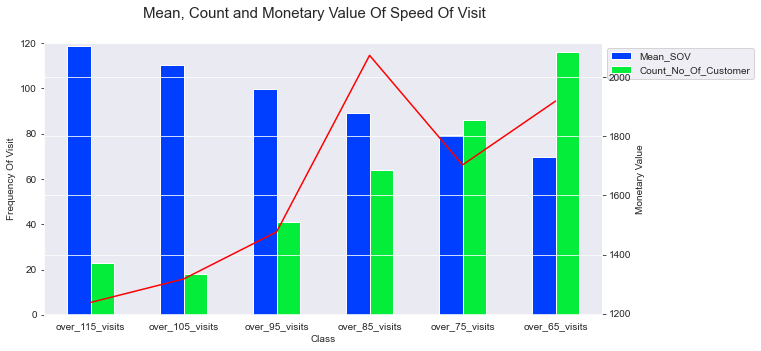

In [78]:
plt.style.use('seaborn-bright')
fig,ax=plt.subplots(figsize=(10,5))
ax1=means_counts_df.plot.bar(x="Class",y=["Mean_SOV","Count_No_Of_Customer"],fontsize=10,rot=40,ax=ax)
ax2=means_counts_df['Mean_Monetary'].plot(secondary_y=True,color='red')
ax1.legend(loc='best', bbox_to_anchor=(1, 1), ncol=1,fontsize=10)
ax1.set_ylim(0,120)
ax1.set_ylabel('Frequency Of Visit')
ax2.set_ylabel('Monetary Value')
fig.suptitle("Mean, Count and Monetary Value Of Speed Of Visit",fontsize=15)

# Show plot
plt.show()

In [79]:
# checking the overall highlights. The number of distinct customers are 4334
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4334 entries, 0 to 4333
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4334 non-null   float64
 1   recency     4334 non-null   int64  
 2   frequency   4334 non-null   int64  
 3   monetary    4334 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 135.6 KB


In [80]:
# checking the summary
rfm.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,CustomerID,recency,frequency,monetary
count,4334.000000,4334.000000,4334.000000,4334.000000
mean,15299.461698,93.171897,4.258191,1981.251445
std,1721.689380,100.122257,7.658263,8527.197292
min,12347.000000,1.000000,1.000000,0.000000
25%,13812.250000,18.000000,1.000000,305.867500
50%,15297.500000,51.000000,2.000000,666.875000
75%,16778.750000,143.000000,5.000000,1649.155000
90%,17685.700000,264.000000,9.000000,3613.486000
95%,17984.350000,312.000000,13.000000,5728.081000
99%,18225.670000,369.000000,30.000000,18315.474900


As we got RFM for each customer, now the objective is to label or categorize the customer into different category based upon their value.

For this first we categorize the R,F,M values into the labels 1-5. 1 being the low and 5 being the highest. Here we make cuts at 25%, 50%, 75% and 90% to distribute them into 5 categories.

After that we sum these values for each row and label the column 'score' which have values range from 3-15.

After that we make cuts on 'score' at 25%, 50%, 75% and 90% to categorize the customers into At risk, Bronze, Silver, Gold and Platinum.

These cuts can be done in many ways like by discussion with the client, according to expert advise, business understanding or quartiles cuts(which we did in this) etc.

In [81]:
# assigning the numbers to RFM values. The better the RFM value higher the number
# note that this process is reverse for R score as lower the value the better it is

rfm['recency_score'] = pd.cut(rfm['recency'], bins=[0,18,51,143,264,375], labels=[5,4,3,2,1])
rfm['recency_score'] = rfm['recency_score'].astype('int')
rfm['frequency_score'] = pd.cut(rfm['frequency'], bins=[0,1,2,5,9,210], labels=[1,2,3,4,5])
rfm['frequency_score'] = rfm['frequency_score'].astype('int')
rfm['monetary_score'] = pd.cut(rfm['monetary'], bins=[-1,306,667,1650,3614,290000], labels=[1,2,3,4,5])
rfm['monetary_score'] = rfm['monetary_score'].astype('int')

In [82]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4334 entries, 0 to 4333
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       4334 non-null   float64
 1   recency          4334 non-null   int64  
 2   frequency        4334 non-null   int64  
 3   monetary         4334 non-null   float64
 4   recency_score    4334 non-null   int32  
 5   frequency_score  4334 non-null   int32  
 6   monetary_score   4334 non-null   int32  
dtypes: float64(2), int32(3), int64(2)
memory usage: 186.4 KB


In [83]:
# summing the R,F,M score to make a one single column that has value range from 3-15

def score_rfm(x) : return (x['recency_score']) + (x['frequency_score']) + (x['monetary_score'])
rfm['score'] = rfm.apply(score_rfm,axis=1 )
rfm.head()

,CustomerID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,score
0,12347.0,3,7,4310.00,5,4,5,14.0
1,12348.0,76,4,1797.24,3,3,4,10.0
2,12349.0,19,1,1757.55,4,1,4,9.0
3,12350.0,311,1,334.40,1,1,2,4.0
4,12352.0,37,7,1665.74,4,4,4,12.0


In [84]:
rfm.score.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    4334.000000
mean        8.413013
std         3.309021
min         3.000000
25%         6.000000
50%         8.000000
75%        11.000000
90%        13.000000
95%        15.000000
99%        15.000000
max        15.000000
Name: score, dtype: float64

In [85]:
# assigning the customers into one of the category At risk, Bronze, Silver, Gold and Platinum based upon the score they get
# we make cuts using percentiles. It can be done in many other ways

rfm['customer_type'] = pd.cut(rfm['score'], bins=[0,6,8,11,13,16], labels=['At risk','Bronze','Silver','Gold','Platinum'])
rfm.head(10)

,CustomerID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,score,customer_type
0,12347.0,3,7,4310.00,5,4,5,14.0,Platinum
1,12348.0,76,4,1797.24,3,3,4,10.0,Silver
2,12349.0,19,1,1757.55,4,1,4,9.0,Silver
3,12350.0,311,1,334.40,1,1,2,4.0,At risk
4,12352.0,37,7,1665.74,4,4,4,12.0,Gold
5,12353.0,205,1,89.00,2,1,1,4.0,At risk
6,12354.0,233,1,1079.40,2,1,3,6.0,At risk
7,12355.0,215,1,459.40,2,1,2,5.0,At risk
8,12356.0,23,3,2811.43,4,3,4,11.0,Silver
9,12357.0,34,1,6207.67,4,1,5,10.0,Silver


In [86]:
round(rfm.customer_type.value_counts(normalize=True)*100,0)

At risk     33.0
Silver      28.0
Bronze      20.0
Gold        10.0
Platinum     9.0
Name: customer_type, dtype: float64

Observations:
    
We see that around 9% of customers are in platinum category and these are the customers who score is best in all the three RFM. Combining with the gold 19% customers are those who are genuine and honest with the business.

Silver category are those where the business can target to convert them into gold category by rolling out offers and new strategies for them.

At risk category are those who are less concerned for the business and does not put much efforts to bring them back.

In [87]:
# looking the RFM value for each of the category
rfm.groupby('customer_type')['recency','frequency','monetary'].mean().round(0)

,recency,frequency,monetary
customer_type,,,
At risk,188.0,1.0,297.0
Bronze,78.0,2.0,621.0
Silver,44.0,4.0,1416.0
Gold,20.0,7.0,2863.0
Platinum,10.0,19.0,12111.0


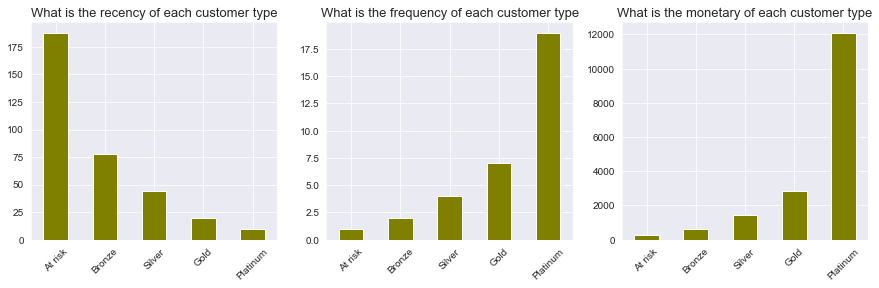

In [88]:
column = ['recency','frequency','monetary']
plt.figure(figsize=(15,4))
for i,j in enumerate(column):
    plt.subplot(1,3,i+1)
    rfm.groupby('customer_type')[j].mean().round(0).plot(kind='bar', color='olive')
    plt.title('What is the {} of each customer type'.format(j), size=13)
    plt.xlabel('')
    plt.xticks(rotation=45)

plt.show()

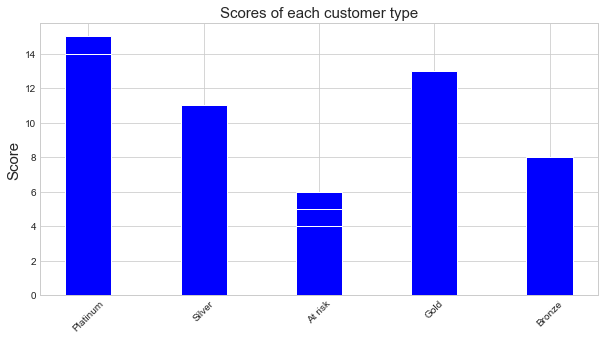

In [89]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(rfm["customer_type"], rfm["score"], color ='blue',
        width = 0.4)
 
plt.xlabel(rfm.groupby('customer_type'),fontsize=15)
plt.xlabel('')
plt.ylabel("Score",fontsize=15)
plt.title("Scores of each customer type",fontsize=15);
plt.xticks(rotation=45)
plt.show()

<font size="5">**K-MEANS CLUSTERING**</font>

In [90]:
# copying the data into new variable
online_retail_kmeans = rfm.copy()
# taking only relevant columns
online_retail_kmeans = online_retail_kmeans.iloc[:,:4]
online_retail_kmeans.head()

,CustomerID,recency,frequency,monetary
0,12347.0,3,7,4310.00
1,12348.0,76,4,1797.24
2,12349.0,19,1,1757.55
3,12350.0,311,1,334.40
4,12352.0,37,7,1665.74


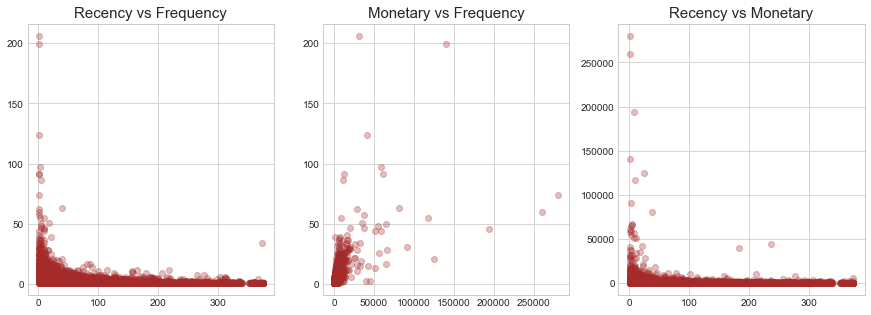

In [91]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(online_retail_kmeans.recency, online_retail_kmeans.frequency, color='brown', alpha=0.3)
plt.title('Recency vs Frequency', size=15)
plt.subplot(1,3,2)
plt.scatter(online_retail_kmeans.monetary, online_retail_kmeans.frequency, color='brown', alpha=0.3)
plt.title('Monetary vs Frequency', size=15)
plt.subplot(1,3,3)
plt.scatter(online_retail_kmeans.recency, online_retail_kmeans.monetary, color='brown', alpha=0.3)
plt.title('Recency vs Monetary', size=15)
plt.show()

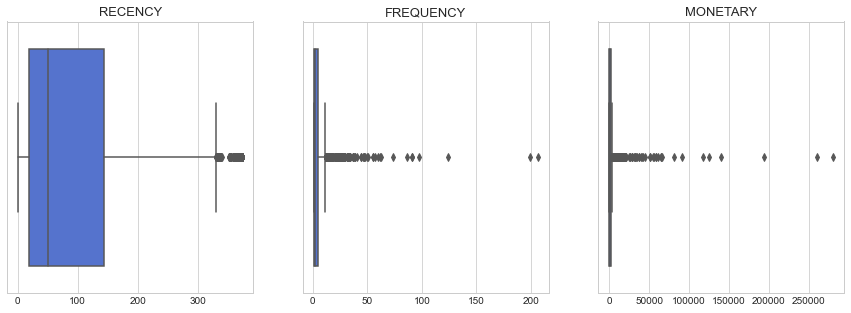

In [92]:
# checking the distribution of the variables

column = ['recency','frequency','monetary']
plt.figure(figsize=(15,5))
for i,j in enumerate(column):
    plt.subplot(1,3,i+1)
    sns.boxplot(online_retail_kmeans[j], color='royalblue')
    plt.xlabel('')
    plt.title('{}'.format(j.upper()), size=13)
plt.show()

In [93]:
# Removing outliers for Monetary
Q1 = online_retail_kmeans.monetary.quantile(0.05)
Q3 = online_retail_kmeans.monetary.quantile(0.95)
IQR = Q3 - Q1
online_retail_kmeans = online_retail_kmeans[(online_retail_kmeans.monetary >= Q1 - 1.5*IQR) & (online_retail_kmeans.monetary <= Q3 + 1.5*IQR)]

# Removing outliers for Recency
Q1 = online_retail_kmeans.recency.quantile(0.05)
Q3 = online_retail_kmeans.recency.quantile(0.95)
IQR = Q3 - Q1
online_retail_kmeans = online_retail_kmeans[(online_retail_kmeans.recency >= Q1 - 1.5*IQR) & (online_retail_kmeans.recency <= Q3 + 1.5*IQR)]

# Removing outliers for Frequency
Q1 = online_retail_kmeans.frequency.quantile(0.05)
Q3 = online_retail_kmeans.frequency.quantile(0.95)
IQR = Q3 - Q1
online_retail_kmeans = online_retail_kmeans[(online_retail_kmeans.frequency >= Q1 - 1.5*IQR) & (online_retail_kmeans.frequency <= Q3 + 1.5*IQR)]

In [94]:
# resetting the index
online_retail_kmeans = online_retail_kmeans.reset_index(drop=True)
online_retail_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4259 entries, 0 to 4258
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4259 non-null   float64
 1   recency     4259 non-null   int64  
 2   frequency   4259 non-null   int64  
 3   monetary    4259 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 133.2 KB


In [95]:
# looking at random 5 rows
online_retail_kmeans.sample(5)

,CustomerID,recency,frequency,monetary
3167,16751.0,31,1,1764.72
4062,18014.0,29,1,154.27
1465,14388.0,11,8,3212.84
1229,14048.0,306,1,409.93
4011,17940.0,50,9,2152.18


In [96]:
# removing customer id as it will not used in making cluster
online_retail_kmeans = online_retail_kmeans.iloc[:,1:]

# scaling the variables and store it in different df
standard_scaler = StandardScaler()
online_retail_kmeans_norm = standard_scaler.fit_transform(online_retail_kmeans)

# converting it into dataframe
online_retail_kmeans_norm = pd.DataFrame(online_retail_kmeans_norm)
online_retail_kmeans_norm.columns = ['recency','frequency','monetary']
online_retail_kmeans_norm.head()

,recency,frequency,monetary
0,-0.912760,0.877595,1.680623
1,-0.184490,0.098534,0.272852
2,-0.753139,-0.680528,0.250616
3,2.159940,-0.680528,-0.546702
4,-0.573566,0.877595,0.199179


Initially without any knowledge we are clustering the data into 5 clusters. The only intuition to do is as in RFM we categorize the data into 5 categories.

Later we look into different methods to decide the optimal value for k.

In [97]:
# Kmeans with K=5

model_clus5 = KMeans(n_clusters = 5)
model_clus5.fit(online_retail_kmeans_norm)

KMeans(n_clusters=5)

In [98]:
# checking the labels
model_clus5.labels_

array([4, 0, 3, ..., 3, 4, 0])

In [122]:
online_retail_kmeans['clusters'] = model_clus5.labels_
online_retail_kmeans.head()
online_retail_kmeans.to_csv("KMeans.csv")

In [100]:
online_retail_kmeans.groupby('clusters').mean().round(0)

,recency,frequency,monetary
clusters,,,
0,34.0,6.0,2014.0
1,14.0,18.0,8775.0
2,254.0,1.0,434.0
3,55.0,2.0,574.0
4,24.0,11.0,4297.0


Finding the Optimal Number of Clusters-


Elbow Curve to get the right number of Clusters

A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

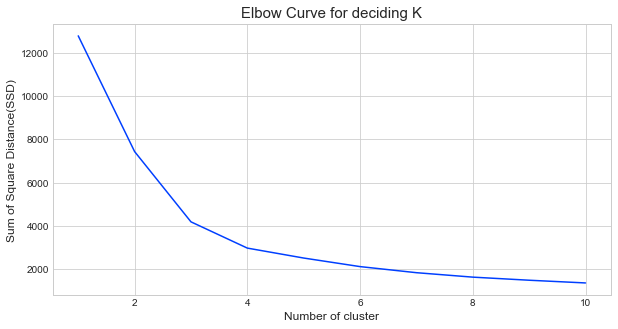

In [101]:
# Elbow-curve/SSD

ssd = []
for num_clusters in list(range(1,11)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(online_retail_kmeans_norm)
    ssd.append(model_clus.inertia_)
    
# plot the SSDs for each n_clusters
plt.figure(figsize=(10,5))
plt.plot(np.arange(1,11,1), ssd)
plt.xlabel('Number of cluster', size=12)
plt.ylabel('Sum of Square Distance(SSD)', size=12)
plt.title('Elbow Curve for deciding K', size=15)
plt.show()

<font size="5">**Silhouette Analysis-**</font>

Silhouette score=
(p
−
q)
/
(m
a
x
(
p
,
q
))
 
 

p is the mean distance to the points in the nearest cluster that the data point is not a part of

q is the mean intra-cluster distance to all the points in its own cluster.

The value of the silhouette score range lies between -1 to 1.

A score closer to 1 indicates that the data point is very similar to other data points in the cluster,
A score closer to -1 indicates that the data point is not similar to the data points in its cluster.


In [102]:
# Silhouette analysis

for num_clusters in list(range(2,11)):
    # intialise kmeans
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(online_retail_kmeans_norm)
    
    cluster_labels = model_clus.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(online_retail_kmeans_norm, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5460929706945657
For n_clusters=3, the silhouette score is 0.5108119992156255
For n_clusters=4, the silhouette score is 0.4865715970728021
For n_clusters=5, the silhouette score is 0.44185916176884094
For n_clusters=6, the silhouette score is 0.4169656865593138
For n_clusters=7, the silhouette score is 0.41756764745297315
For n_clusters=8, the silhouette score is 0.38729582933693785
For n_clusters=9, the silhouette score is 0.3806150875371069
For n_clusters=10, the silhouette score is 0.3829949286834893


From the elbow curve we observe the elbow at cluster 3 and cluster 4.

Also from Silhouette analysis we see the value is better when number of cluster will be 3 rather than 4.

So we now categorize the data into 3 clusters and check their RFM values and its distribution.

In [103]:
# Kmeans with K=3
model_clus3 = KMeans(n_clusters = 3)
model_clus3.fit(online_retail_kmeans_norm)

KMeans(n_clusters=3)

In [104]:
online_retail_kmeans['clusters'] = model_clus3.labels_
online_retail_kmeans.head()

,recency,frequency,monetary,clusters
0,3,7,4310.00,2
1,76,4,1797.24,0
2,19,1,1757.55,0
3,311,1,334.40,1
4,37,7,1665.74,0


In [105]:
online_retail_kmeans.groupby('clusters').mean().round(0)

,recency,frequency,monetary
clusters,,,
0,47.0,3.0,1006.0
1,249.0,1.0,432.0
2,22.0,12.0,5331.0


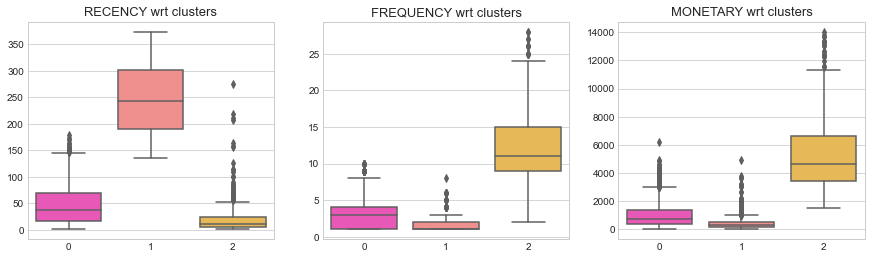

In [106]:
column = ['recency','frequency','monetary']
plt.figure(figsize=(15,4))
for i,j in enumerate(column):
    plt.subplot(1,3,i+1)
    sns.boxplot(y=online_retail_kmeans[j], x=online_retail_kmeans['clusters'], palette='spring')
    plt.title('{} wrt clusters'.format(j.upper()), size=13)
    plt.ylabel('')
    plt.xlabel('')

plt.show()

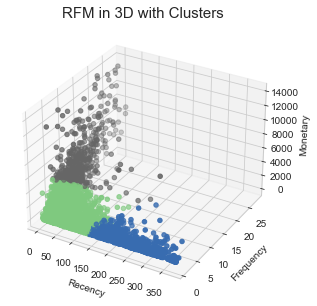

In [107]:
# Creating figure
fig = plt.figure(figsize = (10, 5))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(online_retail_kmeans.recency, online_retail_kmeans.frequency, online_retail_kmeans.monetary, c=online_retail_kmeans.clusters, cmap='Accent')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('RFM in 3D with Clusters', size=15)
ax.set(facecolor='white')
plt.show()

Observations:
    
In the above 3D graph, I put all the three variable into 3 axis and added the cluster variable to differentiate the points.

Grey points is the group of customers whose Recency is high, Frequency is low and Monetary value is also low.

Green points are the group of customers whose Recency is low, Frequency is better than grey ones and Monetary is good.

Blue points are the group of customers whose Recency is low(that is good), Frequency is better than the other two and Monetary is high.

In [118]:
def converter(cluster):
    if cluster==0:
        return 0
    elif cluster==1:
        return 1
    else:
        return 2
online_retail_kmeans['Cluster'] = online_retail_kmeans['clusters'].apply(converter)
online_retail_kmeans.head(1)

,recency,frequency,monetary,clusters,Cluster
0,3,7,4310.0,2,2


In [115]:
online_retail_kmeans.clusters.value_counts()

0    2760
1    1059
2     440
Name: clusters, dtype: int64

In [121]:
from sklearn.metrics import confusion_matrix,classification_report
print("ConfusionMatrix",confusion_matrix(online_retail_kmeans['Cluster'],model_clus3.labels_))
print(classification_report(online_retail_kmeans['Cluster'],model_clus3.labels_))

ConfusionMatrix [[2760    0    0]
 [   0 1059    0]
 [   0    0  440]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2760
           1       1.00      1.00      1.00      1059
           2       1.00      1.00      1.00       440

    accuracy                           1.00      4259
   macro avg       1.00      1.00      1.00      4259
weighted avg       1.00      1.00      1.00      4259

